In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

start: 85374 records in this dataset 

In [340]:
state_dict = {'Alabama':1,
              'Alaska':1,
              'American Samoa':1,
              'Arizona':1,
              'Arkansas':1,
              'California':1,
              'Colorado':1,
              'Connecticut':1,
              'Delaware':1,
              'Diamond Princess':1,
              'District of Columbia':1,
              'Florida':1,
              'Georgia':1,
              'Grand Princess':1,
              'Guam':1,
              'Hawaii':1,
              'Idaho':1,
              'Illinois':1,
              'Indiana':1,
              'Iowa':1,
              'Kansas':1,
              'Kentucky':1,
              'Louisiana':1,
              'Maine':1,
              'Maryland':1,
              'Massachusetts':1,
              'Michigan':1,
              'Minnesota':1,
              'Mississippi':1,
              'Missouri':1,
              'Montana':1,
              'Nebraska':1,
              'Nevada':1,
              'New Hampshire':1,
              'New Jersey':1,
              'New Mexico':1,
              'New York':1,
              'North Carolina':1,
              'North Dakota':1,
              'Northern Mariana Islands':1,
              'Ohio':1,
              'Oklahoma':1,
              'Oregon':1,
              'Pennsylvania':1,
              'Puerto Rico':1,
              'Rhode Island':1,
              'South Carolina':1,
              'South Dakota':1,
              'Tennessee':1,
              'Texas':1,
              'Utah':1,
              'Vermont':1,
              'Virgin Islands':1,
              'Virginia':1,
              'Washington':1,
              'West Virginia':1,
              'Wisconsin':1,
              'Wyoming':1,
              'Recovered':pd.DataFrame()}


In [341]:
path = './datasets/csse_covid_19_daily_reports_us'

first = True

for file in sorted(os.listdir(path)):
    
    file_path = os.path.join(path, file)
    #print(file_path)
    if os.path.isfile(file_path):
        if file != 'README.md':
            temp = pd.read_csv(file_path)
            date = file[0:10]
            date = pd.to_datetime(date, format="%m-%d-%Y")

            for i in range(len(temp)):
                state = temp.iloc[i,0]
                if state == 'Recovered':
                    print(file_path)

                if(first):
                    state_dict[state] = pd.DataFrame(temp.iloc[[i]])
                    state_dict[state]['datetime'] = date
                    #display(state_dict[state])
                else:
                    state_dict[state] = pd.concat([state_dict[state], pd.DataFrame(temp.iloc[[i]])], ignore_index=True)          
                    state_dict[state].iloc[-1,-1] = date
            first=False

./datasets/csse_covid_19_daily_reports_us/04-12-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-13-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-14-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-15-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-16-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-17-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-18-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-19-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-20-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-21-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-22-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-23-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-24-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-25-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-26-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-27-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-28-2020.csv
./datasets/csse_covid_19_daily_

### Remove erronious value

Alabama
Alaska
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Louisiana
Maine
Maryland
Michigan
Minnesota
Mississippi
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
Ohio
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
Wisconsin
Wyoming


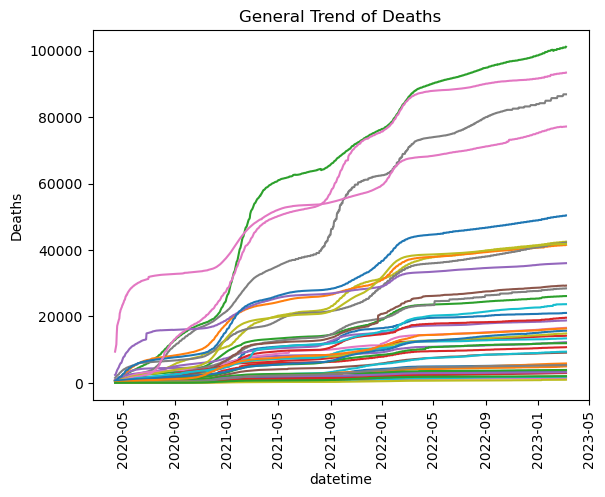

In [342]:
# df = state_dict['Alabama']
# df['current cases'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
# sns.scatterplot(df, x='datetime', y='Active')
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Florida']
states_r = ['Idaho', 'Montana', 'Wyoming', 'Utah', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma',
            'Texas', 'Iowa', 'Missouri', 'Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Florida', 'Tennessee',
            'South Carolina', 'North Carolina', 'Kentucky', 'Indiana', 'Ohio', 'West Virginia']
states_d = ['Washington', 'Oregon', 'California', 'Nevada', 'Arizona', 'New Mexico', 'Colorado']

non_states = ['Recovered', 'American Samoa', 'Grand Princess', 'Diamond Princess', 'Guam', 'Puerto Rico', 'Northern Mariana Islands', 'Virgin Islands']

bad_states = ['American Samoa', 'Arizona', 'Arkansas', 'Diamond Princess', 'Grand Princess', 'Guam', 'Kansas', 'Kentucky', 'Massachusetts', 'Missouri', 'North Dakota', 'Northern Mariana Islands', 'Oklahoma', 'Virgin Islands', 'West Virginia', 'Recovered']

for state in state_dict:
    if state not in bad_states:
        #state_dict[state].plot('datetime', ['Active', 'Deaths', 'Recovered'])
        print(state)
        sns.lineplot(state_dict[state], x='datetime', y='Deaths', estimator=None, errorbar='sd') # , label=state)

#plt.legend()
plt.title('General Trend of Deaths')
# plt.xlim(365*52, 365*52 + 460)
# plt.ylim(0.2, 2.2)
plt.xticks(rotation=90)
plt.show()

### Import Population Data

In [343]:
pop_data = pd.read_excel('../datasets/apportionment-2020-table02.xlsx', header=3).drop(columns='This cell is intentionally blank.').set_index('AREA')
# pop_data.loc['Alabama', 'RESIDENT POPULATION (APRIL 1, 2020)']
for state in state_dict:
    if state not in bad_states:
        state_dict[state]['Deaths per capita'] = state_dict[state]['Deaths']/pop_data.loc[state, 'RESIDENT POPULATION (APRIL 1, 2020)']
        # sns.lineplot(state_dict[state], x='datetime', y='Confirmed'/pop_data.loc[state, 'RESIDENT POPULATION (APRIL 1, 2020)'])


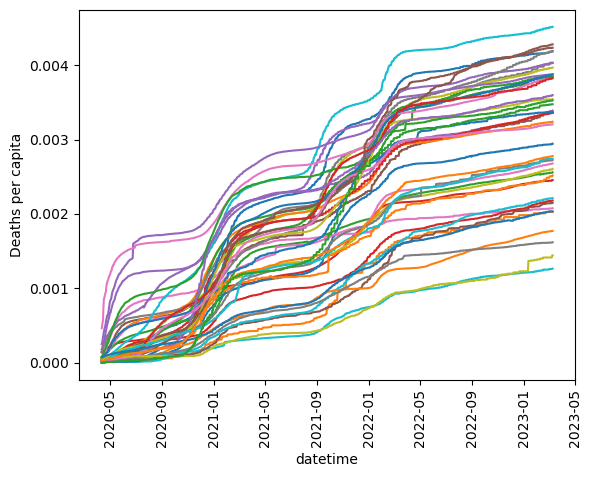

In [344]:
for state in state_dict:
    if state not in bad_states:
        sns.lineplot(state_dict[state], x='datetime', y='Deaths per capita')

plt.xticks(rotation=90)
plt.show()

In [345]:
for state in state_dict:
    if state not in bad_states:
        for i in range(1, len(state_dict[state])):
            if i == 1:
                state_dict[state] = state_dict[state].sort_values(by='datetime', ascending=True).reset_index().drop(columns='index')
                state_dict[state]['Deaths per capita per day'] = -999
                state_dict[state]['Deaths per capita per day'][0] = state_dict[state]['Deaths per capita'][0]
            state_dict[state]['Deaths per capita per day'][i] = state_dict[state]['Deaths per capita'][i] - state_dict[state]['Deaths per capita'][i-1]

### OHE Encoder Helper Function

In [346]:
def ohe(data, col):
    dummy = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummy], axis=1)
    data.drop(columns=col, inplace=True)
    return data

### OHE Month

In [347]:
# Initialize month OHE
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# Isolate month
for state in state_dict:
    if state not in bad_states:
        state_dict[state]['month'] = state_dict[state]['datetime'].dt.month

# OHE month
for state in state_dict:
    if state not in bad_states:
        state_dict[state] = ohe(state_dict[state], 'month')

In [348]:
state_dict['Alabama'].head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,NaN,1.0,...,False,True,False,False,False,False,False,False,False,False
1,Alabama,US,2020-04-13 23:07:54,32.3182,-86.9023,3870,99,NaN,NaN,1.0,...,False,True,False,False,False,False,False,False,False,False
2,Alabama,US,2020-04-14 23:33:31,32.3182,-86.9023,4041,114,NaN,NaN,1.0,...,False,True,False,False,False,False,False,False,False,False
3,Alabama,US,2020-04-15 22:56:51,32.3182,-86.9023,4307,118,NaN,NaN,1.0,...,False,True,False,False,False,False,False,False,False,False
4,Alabama,US,2020-04-16 23:30:51,32.3182,-86.9023,4465,133,NaN,NaN,1.0,...,False,True,False,False,False,False,False,False,False,False


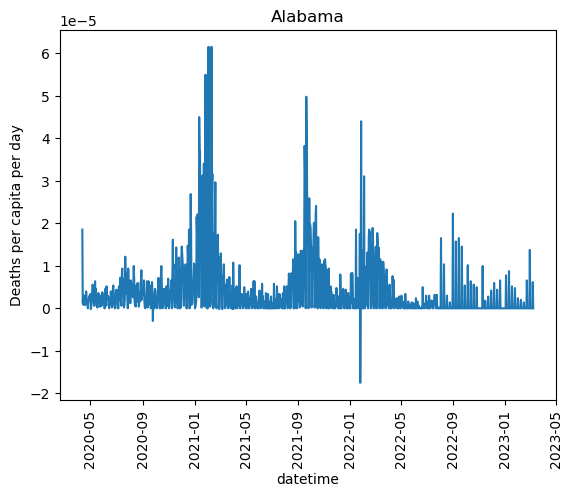

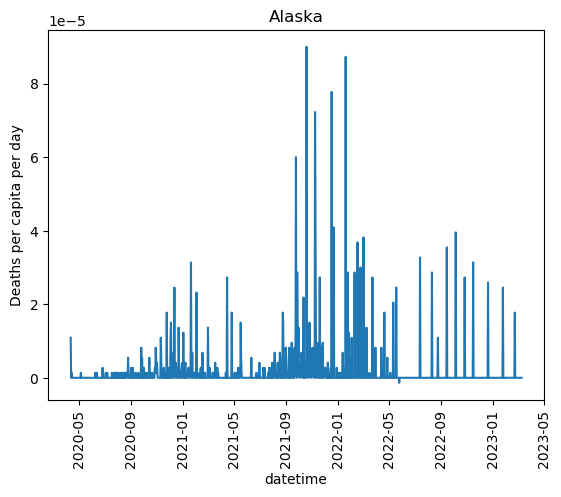

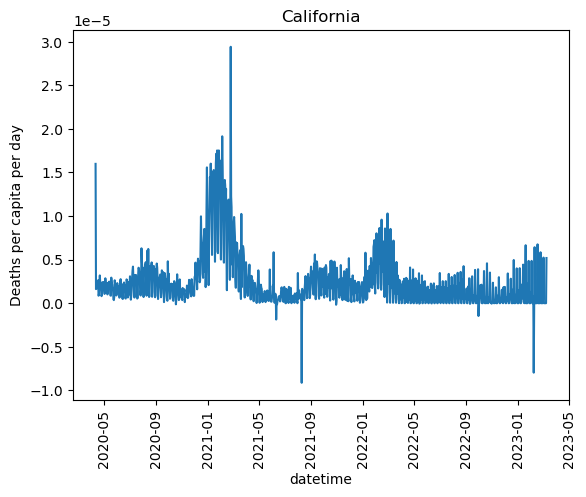

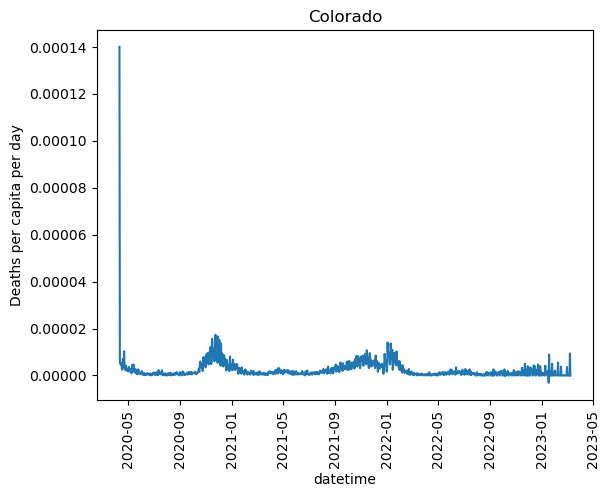

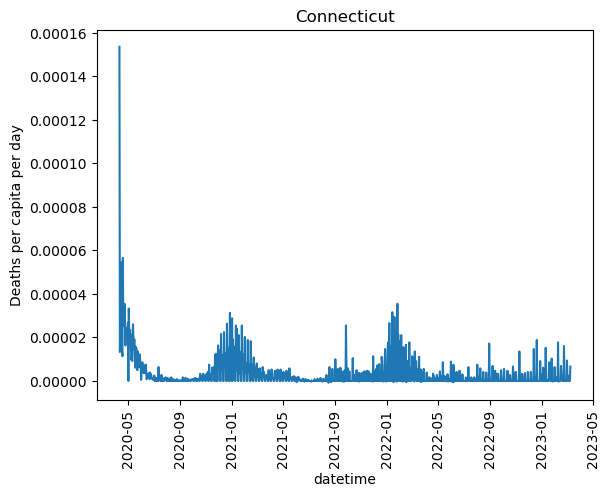

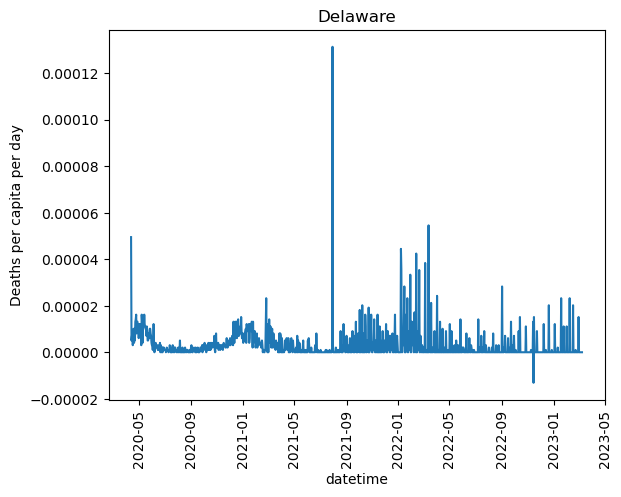

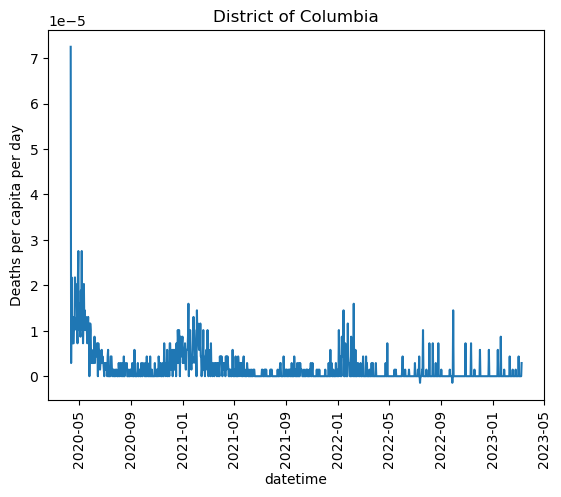

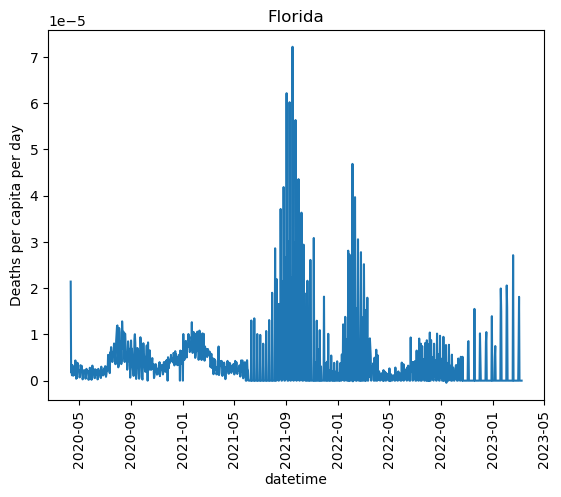

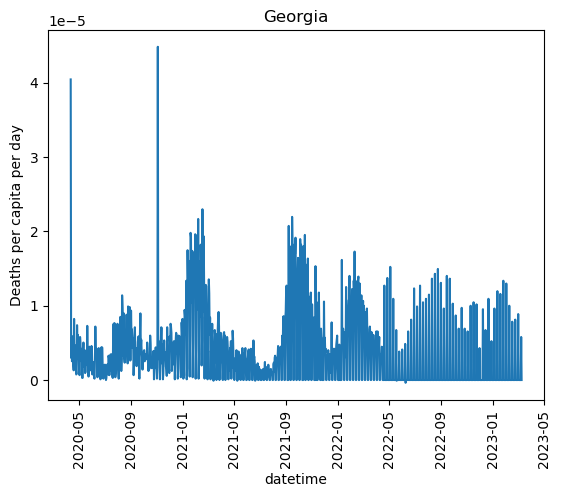

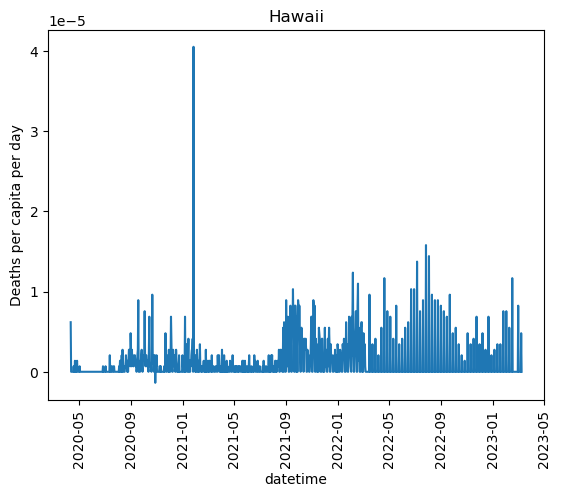

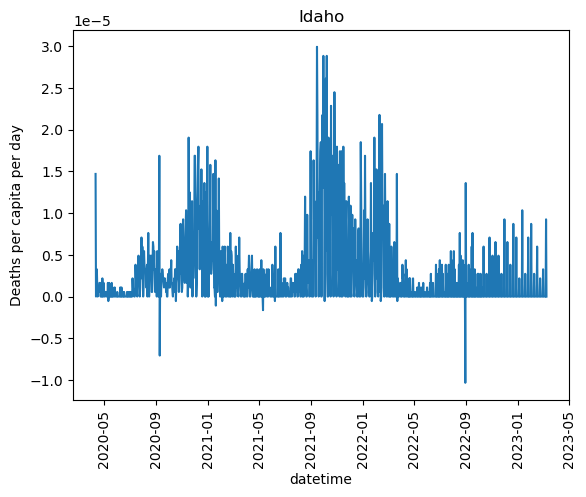

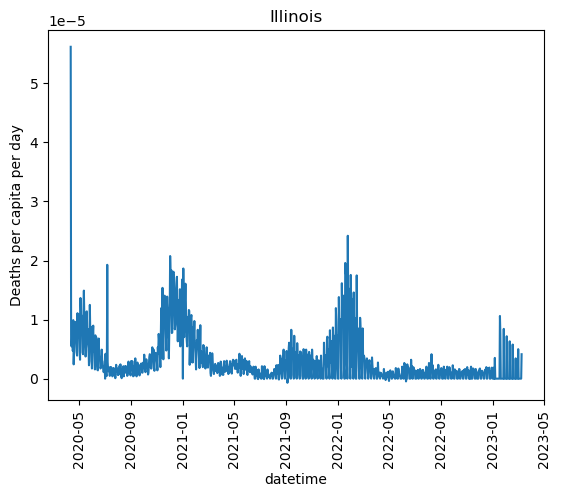

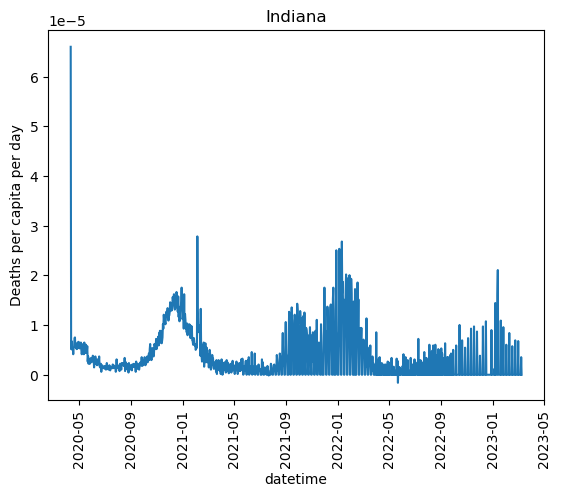

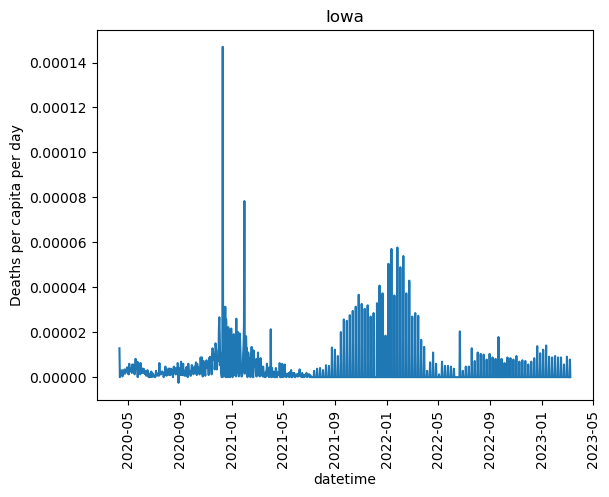

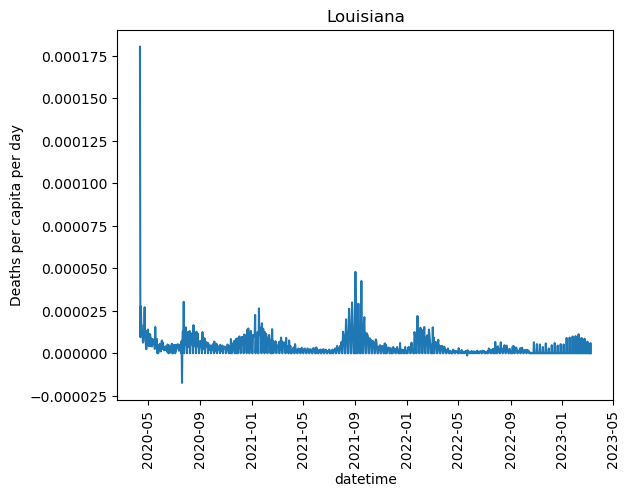

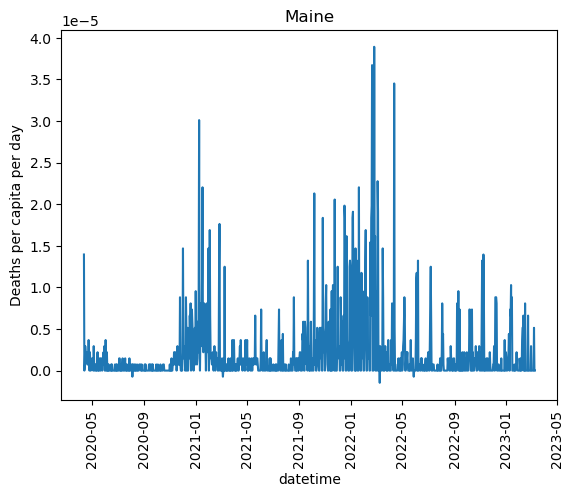

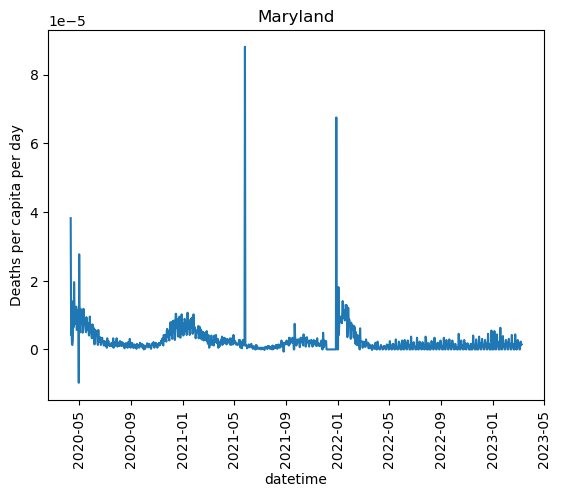

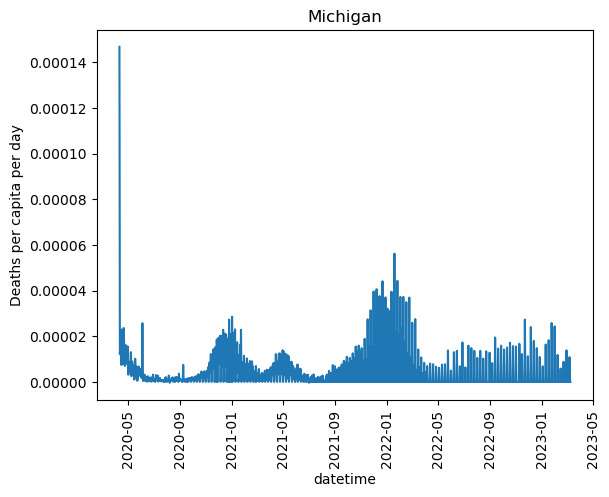

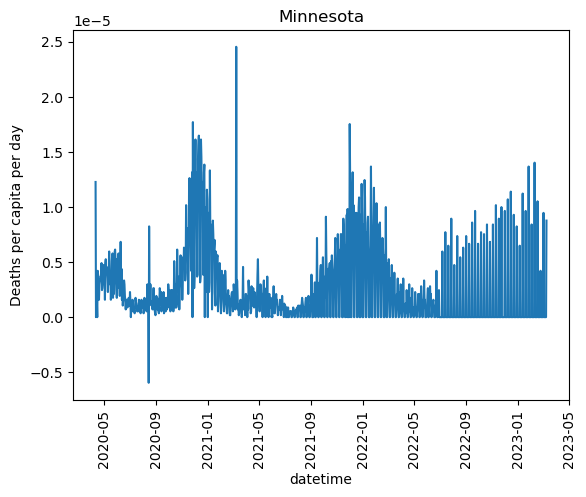

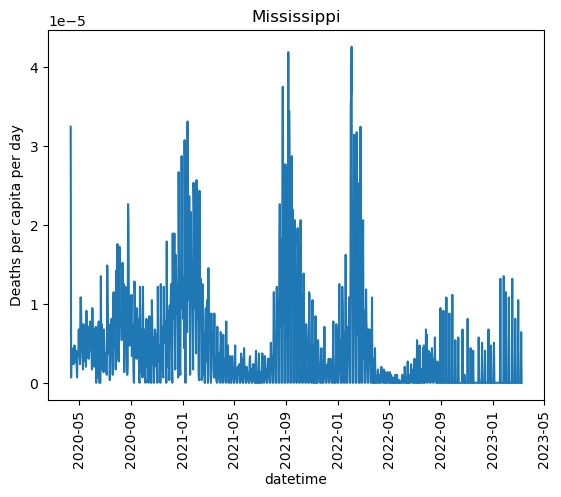

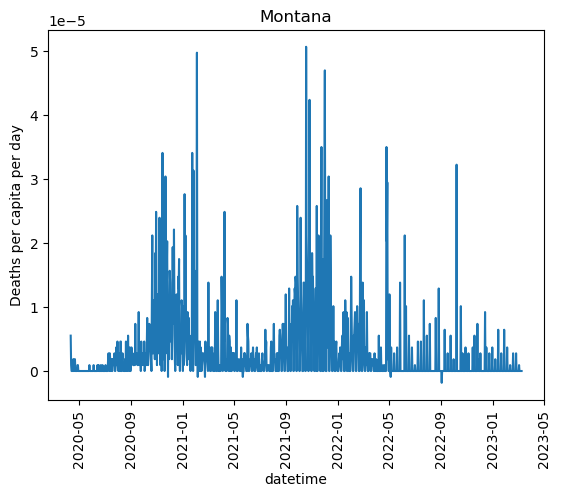

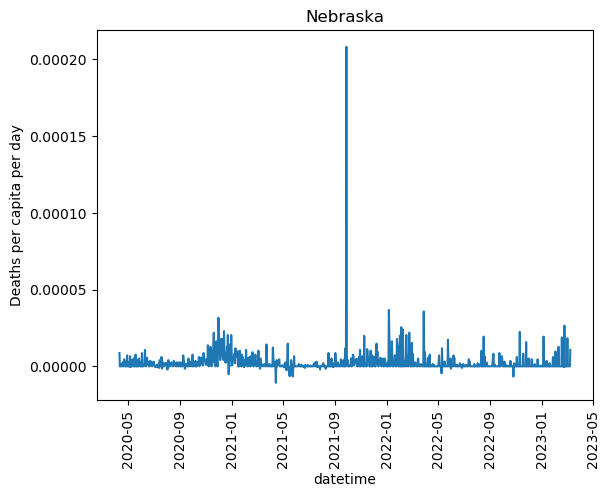

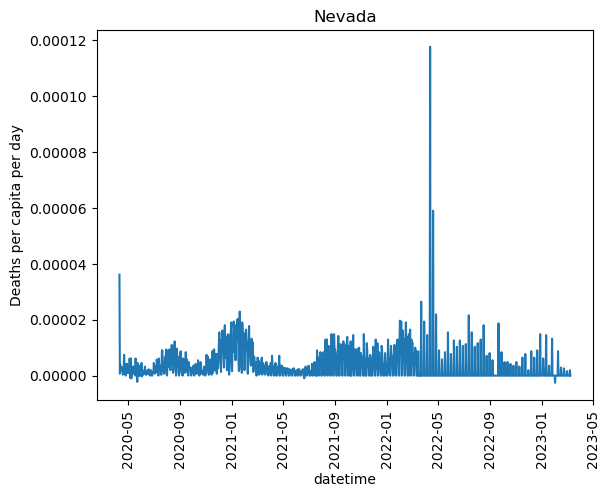

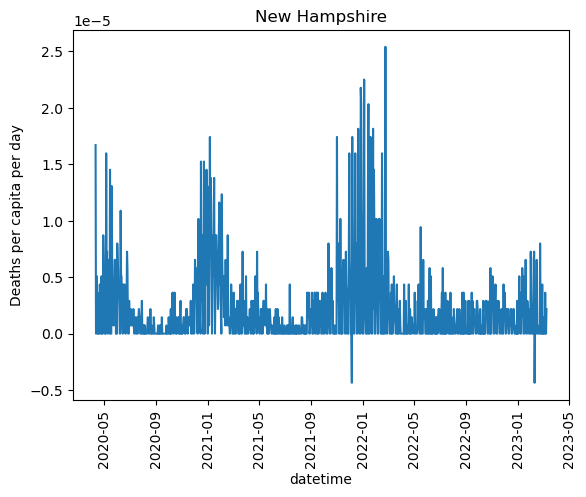

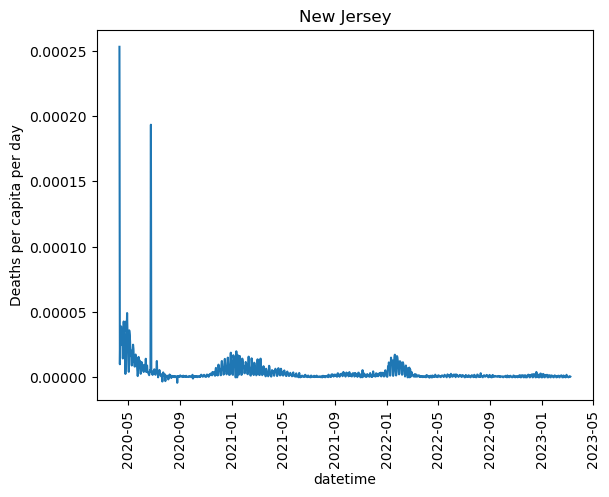

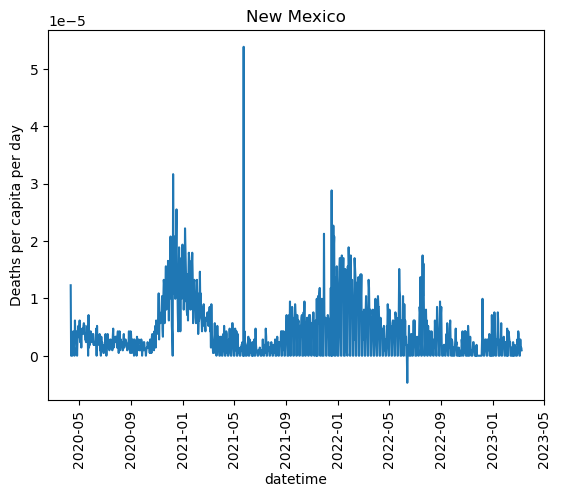

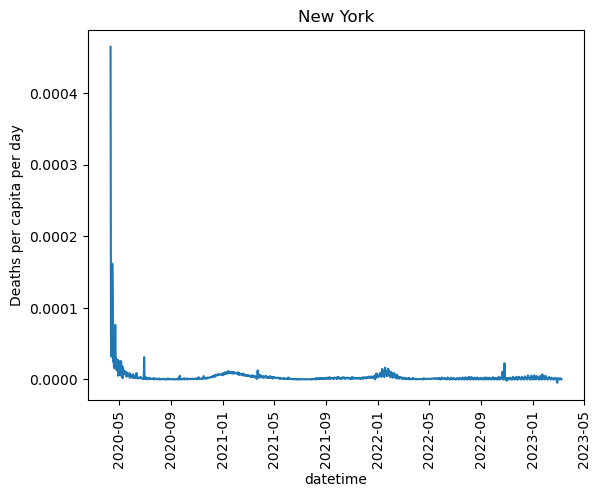

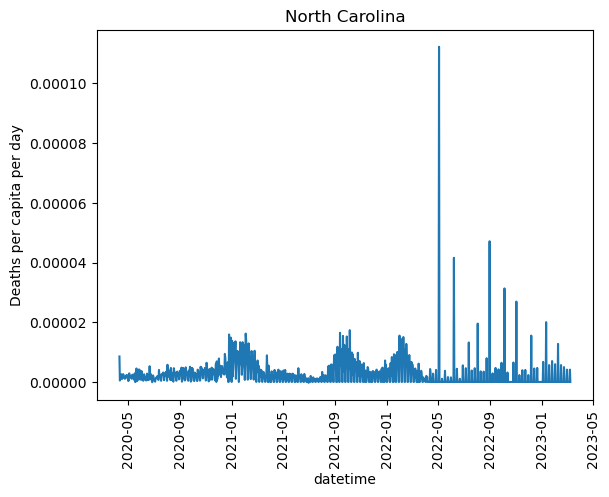

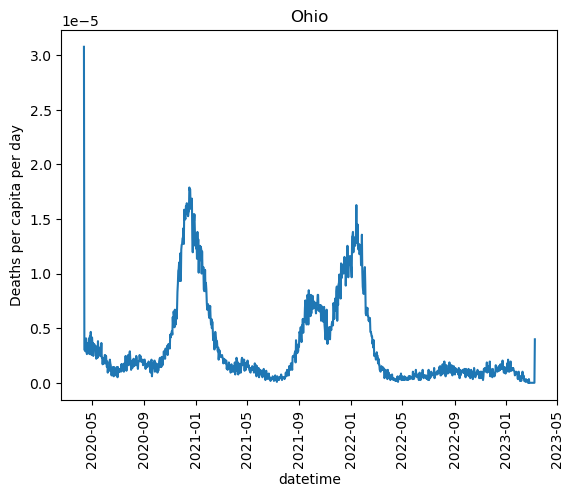

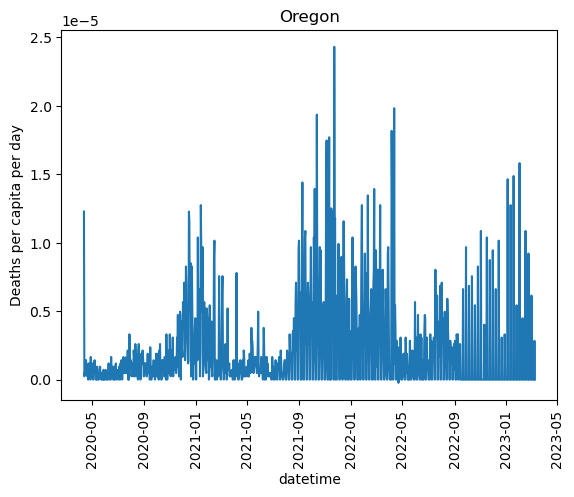

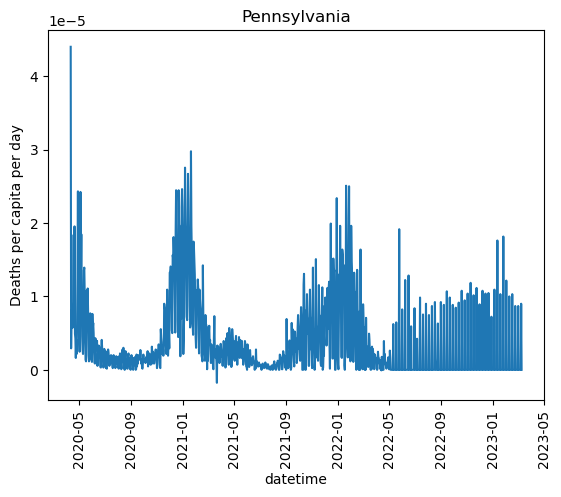

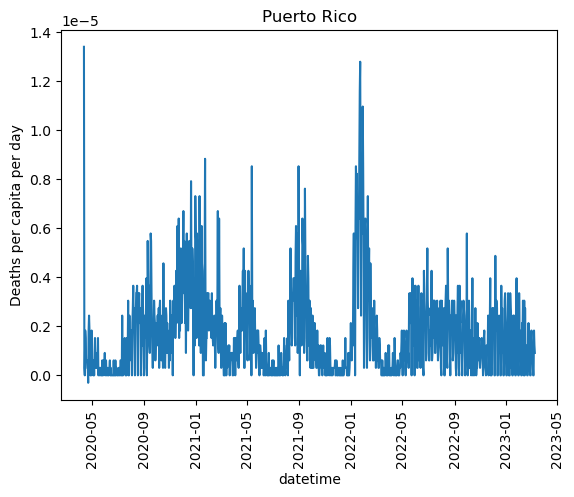

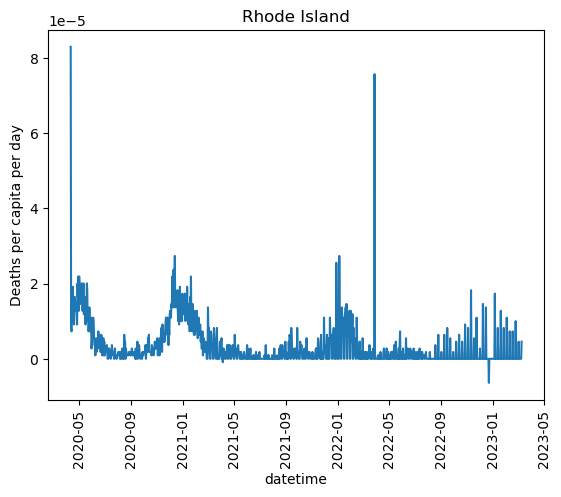

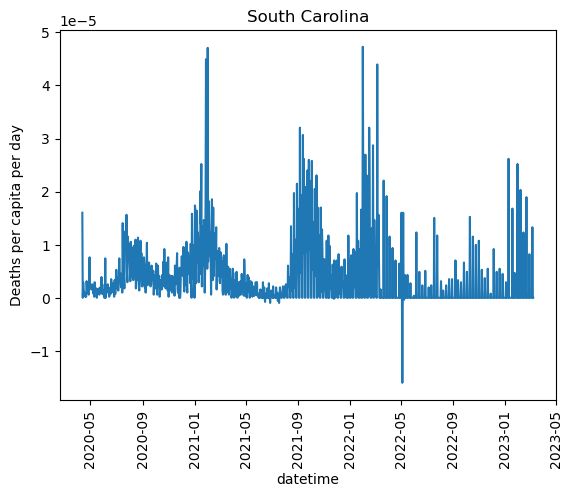

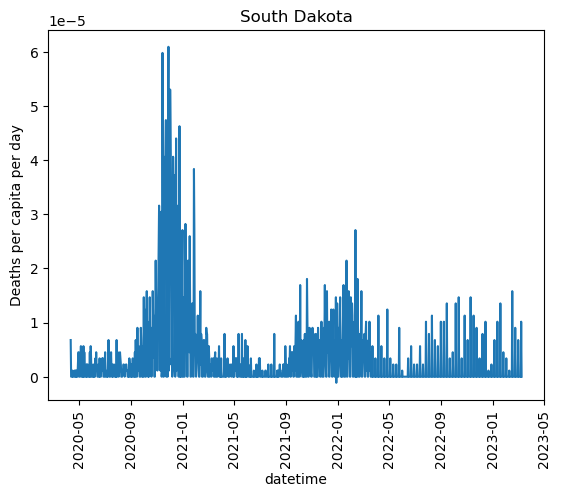

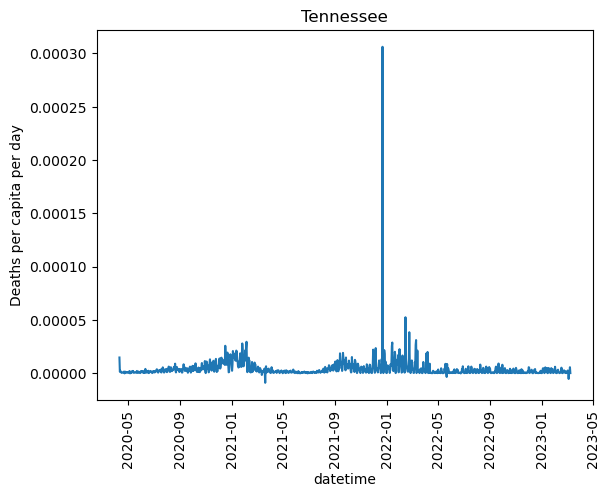

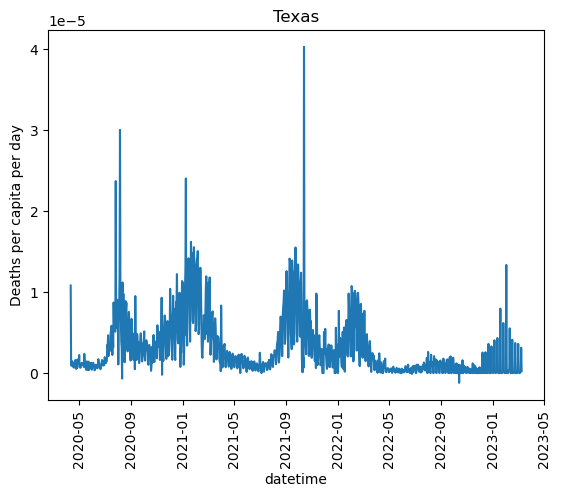

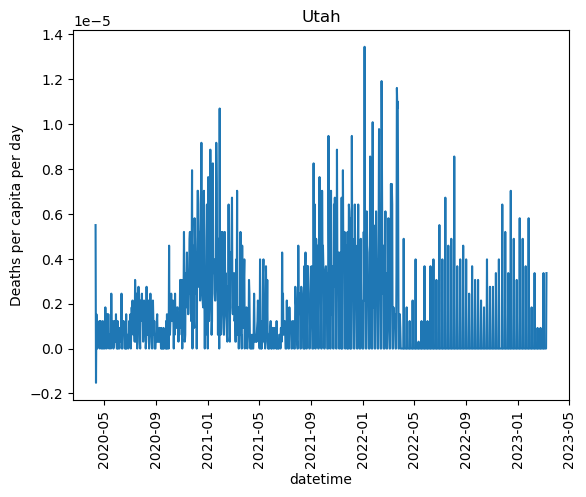

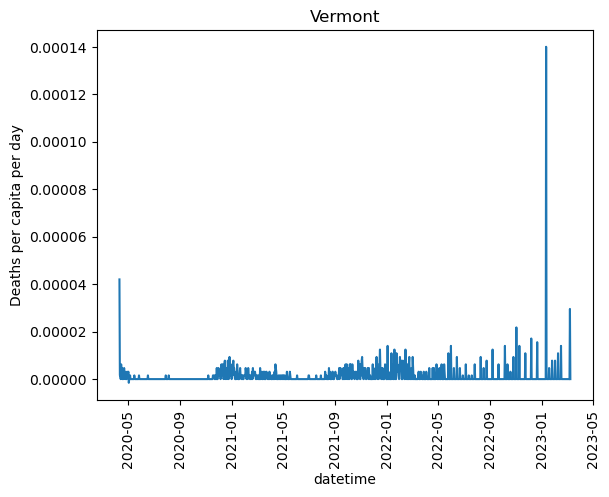

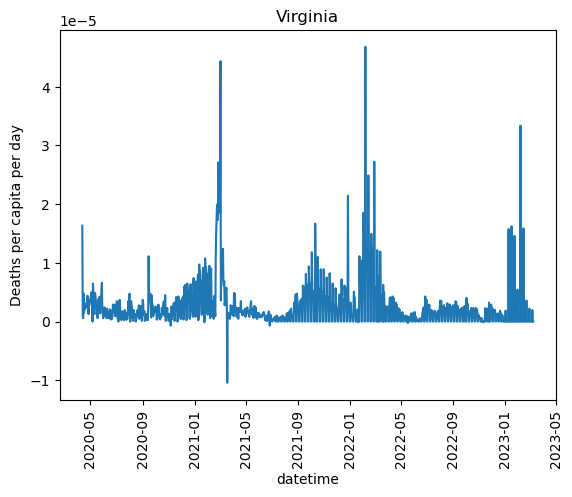

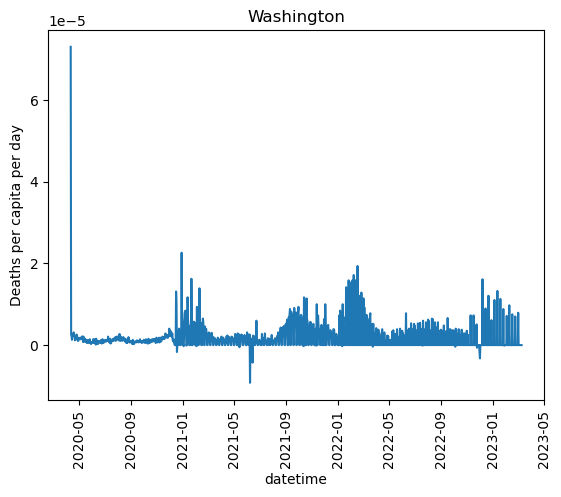

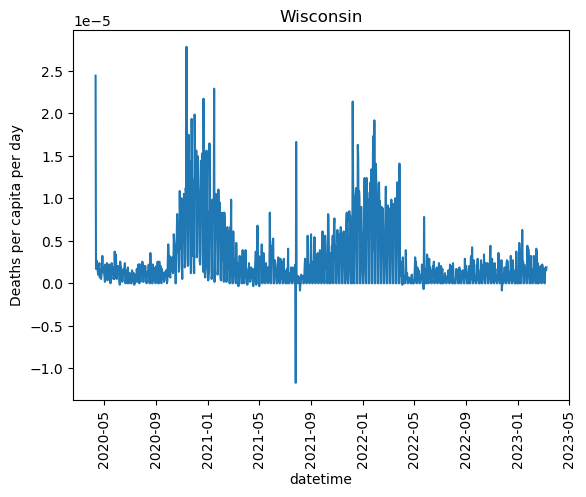

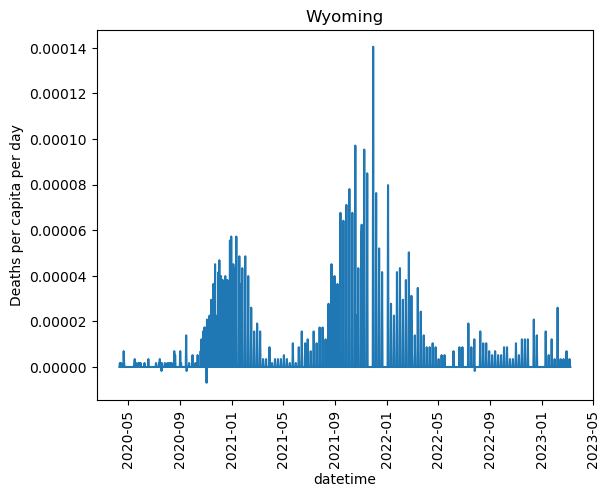

In [349]:
for state in state_dict.keys():
    if state not in bad_states:
        df = state_dict[state]
        sns.lineplot(df, x='datetime', y='Deaths per capita per day')
        plt.xticks(rotation=90)
        plt.title(state)
        # plt.xlim(18400, 19000)
        plt.show()

#sns.lineplot(df, x='datetime', y='Active')

### Combine dataframe and OHE states

In [350]:
for state in state_dict:
    if state not in bad_states:
        if state == 'Alabama':
            master = state_dict[state]
        else:
            master = pd.concat([master, state_dict[state]])

master = ohe(master, 'Province_State')

In [366]:
master.drop(columns=['People_Hospitalized', 'Recovered', 'Active', 'People_Tested', 'Mortality_Rate', 'Hospitalization_Rate'], inplace=True)
master.dropna(inplace=True)
master.drop(columns=['Country_Region', 'Last_Update', 'Lat', 'Long_', 'FIPS', 'UID', 'ISO3', 'Date', \
                     ], inplace=True)
master.columns

Index(['Confirmed', 'Deaths', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'datetime', 'Deaths per capita',
       'Deaths per capita per day', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'Province_State_Alabama',
       'Province_State_Alaska', 'Province_State_California',
       'Province_State_Colorado', 'Province_State_Connecticut',
       'Province_State_Delaware', 'Province_State_District of Columbia',
       'Province_State_Florida', 'Province_State_Georgia',
       'Province_State_Hawaii', 'Province_State_Idaho',
       'Province_State_Illinois', 'Province_State_Indiana',
       'Province_State_Iowa', 'Province_State_Louisiana',
       'Province_State_Maine', 'Province_State_Maryland',
       'Province_State_Michigan', 'Province_State_Minnesota',
       'Province_State_Mississippi', 'Province_State_Montana',
       'Province_State_Nebr

In [ ]:
'Confirmed', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate',

### Drop Columns

In [367]:
print(master.shape)
print(master['Case_Fatality_Ratio'].isna().sum())


(26863, 64)
0


### Save Dataframe

In [157]:
master.to_csv('master.csv')

In [158]:
master

,Confirmed,Deaths,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,datetime,Deaths per capita,Deaths per capita per day,month_1,...,Province_State_South Carolina,Province_State_South Dakota,Province_State_Tennessee,Province_State_Texas,Province_State_Utah,Province_State_Vermont,Province_State_Virginia,Province_State_Washington,Province_State_Wisconsin,Province_State_Wyoming
211,20309,86,2776.179182,767997.0,0.423458,104982.878702,2020-11-09,0.000117,0.000000,False,...,False,False,False,False,False,False,False,False,False,False
212,20839,94,2848.628587,828140.0,0.451077,113204.245809,2020-11-10,0.000128,0.000011,False,...,False,False,False,False,False,False,False,False,False,False
213,21338,98,2916.840386,834590.0,0.459275,114085.941398,2020-11-11,0.000134,0.000005,False,...,False,False,False,False,False,False,False,False,False,False
214,21825,98,2983.411820,844666.0,0.449026,115463.300275,2020-11-12,0.000134,0.000000,False,...,False,False,False,False,False,False,False,False,False,False
215,22418,99,3064.473136,844666.0,0.441609,115463.300275,2020-11-13,0.000135,0.000001,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,175746,1888,30366.007267,1512077.0,1.074278,261261.941499,2022-09-16,0.003273,0.000000,False,...,False,False,False,False,False,False,False,False,False,True
888,175746,1888,30366.007267,1512077.0,1.074278,261261.941499,2022-09-17,0.003273,0.000000,False,...,False,False,False,False,False,False,False,False,False,True
889,175746,1888,30366.007267,1512077.0,1.074278,261261.941499,2022-09-18,0.003273,0.000000,False,...,False,False,False,False,False,False,False,False,False,True
890,175746,1888,30366.007267,1512077.0,1.074278,261261.941499,2022-09-19,0.003273,0.000000,False,...,False,False,False,False,False,False,False,False,False,True


### Stuff Below

In [369]:
import copy

master_copy = copy.deepcopy(master).reset_index()

target = master_copy['Deaths per capita per day']
master_copy.drop(columns=['datetime'], inplace=True)
# master_copy.drop(columns=['Deaths per capita per day', 'Deaths per capita', 'datetime', 'Deaths', 'Incident_Rate', 
                        #   'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate', 'index', 'Confirmed'], inplace=True)
master_copy.columns

Index(['index', 'Confirmed', 'Deaths', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'Deaths per capita',
       'Deaths per capita per day', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'Province_State_Alabama',
       'Province_State_Alaska', 'Province_State_California',
       'Province_State_Colorado', 'Province_State_Connecticut',
       'Province_State_Delaware', 'Province_State_District of Columbia',
       'Province_State_Florida', 'Province_State_Georgia',
       'Province_State_Hawaii', 'Province_State_Idaho',
       'Province_State_Illinois', 'Province_State_Indiana',
       'Province_State_Iowa', 'Province_State_Louisiana',
       'Province_State_Maine', 'Province_State_Maryland',
       'Province_State_Michigan', 'Province_State_Minnesota',
       'Province_State_Mississippi', 'Province_State_Montana',
       'Province_State_Nebrask

In [370]:
len(master_copy)

26863

In [161]:
# master_copy.drop(master_copy[master_copy['Total_Test_Results'].isna()].index, inplace=True)

In [162]:
# master_copy.drop(master_copy[master_copy['Case_Fatality_Ratio'].isna()].index, inplace=True)

In [371]:
# np.sum(master_copy.isna()).iloc[0:30]
print('len: ', len(master_copy))
print('NaN: ', np.sum(np.sum(master_copy.isna()).iloc[0:30]))

len:  26863
NaN:  0


In [164]:
master_copy.to_csv('master_copy.csv')

# Isolate Target

In [372]:
X = copy.deepcopy(master_copy).astype(float)

# X.dropna(subset=[col for col in X.columns if np.nan in X[col].values], inplace=True)
# X = X.dropna(axis=1)
target=X['Deaths per capita per day']
X.drop(columns=['Deaths', 'Deaths per capita per day', 'Deaths per capita', 'index'], inplace=True)
# X_vals.drop(columns=['Deaths'], inplace=True)
X.shape

(26863, 60)

In [375]:
X.columns

Index(['Confirmed', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'Province_State_Alabama',
       'Province_State_Alaska', 'Province_State_California',
       'Province_State_Colorado', 'Province_State_Connecticut',
       'Province_State_Delaware', 'Province_State_District of Columbia',
       'Province_State_Florida', 'Province_State_Georgia',
       'Province_State_Hawaii', 'Province_State_Idaho',
       'Province_State_Illinois', 'Province_State_Indiana',
       'Province_State_Iowa', 'Province_State_Louisiana',
       'Province_State_Maine', 'Province_State_Maryland',
       'Province_State_Michigan', 'Province_State_Minnesota',
       'Province_State_Mississippi', 'Province_State_Montana',
       'Province_State_Nebraska', 'Province_State_Nevada',
       'Province_State_New Hampshire', 'Provinc

# Predicting Deaths

In [373]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values.
    Input:
      predicted (1D array): Vector of predicted/fitted values
      actual (1D array): Vector of actual values
    Output:
      A float, the RMSE value.
    """
    return np.sqrt(np.mean((actual - predicted)**2))

In [374]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42) 

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print()

# List to store RMSE values for each fold
rmse_scores = []
fold = 0 
for train_index, test_index in kf.split(X):
    model = LinearRegression(fit_intercept=True)
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    rmse_value = rmse(predictions, y_test)
    rmse_scores.append(rmse_value)
    print(f"Fold {fold} rmse: {rmse_value}")

average_rmse = np.mean(rmse_scores)
print(f"average rmse: {average_rmse}")

X_train:  (21490, 60)
X_test:  (5373, 60)

Fold 1 rmse: 5.717464749190982e-06
Fold 2 rmse: 5.476722735712885e-06
Fold 3 rmse: 5.3372485035542e-06
Fold 4 rmse: 6.56738486660569e-06
Fold 5 rmse: 6.516666194588715e-06
average rmse: 5.923097409930495e-06


In [378]:
np.average(y_test)

3.602155948213089e-06

# PCA

In [284]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42) 

# Normalize train_X and test_X using MinMaxScaler
scaler = MinMaxScaler((0,1))
norm_train_X = scaler.fit_transform(X_train)
norm_test_X = scaler.fit_transform(X_test)

# Perform PCA
pca = PCA(n_components=0.99)
pca.fit(norm_train_X)
norm_train_X_pca = pca.transform(norm_train_X)
norm_test_X_pca = pca.transform(norm_test_X) # .reshape(-1,32*32))
print('norm_train_X_pca: ', norm_train_X_pca.shape)
print('norm_test_X_pca: ', norm_test_X_pca.shape)
print()

# List to store RMSE values for each fold
rmse_scores = []
fold = 0 
for train_index, test_index in kf.split(X):
    model = LinearRegression(fit_intercept=True)
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    rmse_value = rmse(predictions, y_test)
    rmse_scores.append(rmse_value)
    print(f"Fold {fold} rmse: {rmse_value}")

average_rmse = np.mean(rmse_scores)
print(f"average rmse: {average_rmse}")

norm_train_X_pca:  (21490, 53)
norm_test_X_pca:  (5373, 53)

Fold 1 rmse: 5.717464749190982e-06
Fold 2 rmse: 5.476722735712885e-06
Fold 3 rmse: 5.3372485035542e-06
Fold 4 rmse: 6.56738486660569e-06
Fold 5 rmse: 6.516666194588715e-06
average rmse: 5.923097409930495e-06


In [285]:
X_train.columns

Index(['Confirmed', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'Province_State_Alabama',
       'Province_State_Alaska', 'Province_State_California',
       'Province_State_Colorado', 'Province_State_Connecticut',
       'Province_State_Delaware', 'Province_State_District of Columbia',
       'Province_State_Florida', 'Province_State_Georgia',
       'Province_State_Hawaii', 'Province_State_Idaho',
       'Province_State_Illinois', 'Province_State_Indiana',
       'Province_State_Iowa', 'Province_State_Louisiana',
       'Province_State_Maine', 'Province_State_Maryland',
       'Province_State_Michigan', 'Province_State_Minnesota',
       'Province_State_Mississippi', 'Province_State_Montana',
       'Province_State_Nebraska', 'Province_State_Nevada',
       'Province_State_New Hampshire', 'Provinc

In [286]:
X = copy.deepcopy(master_copy).astype(float)

# X.dropna(subset=[col for col in X.columns if np.nan in X[col].values], inplace=True)
# X = X.dropna(axis=1)
target=X['Deaths per capita per day']
X.drop(columns=['Deaths', 'Deaths per capita per day', 'Deaths per capita', 'index'], inplace=True)
# X_vals.drop(columns=['Deaths'], inplace=True)
X.shape

(26863, 60)

In [287]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42) 

# Normalize train_X and test_X using MinMaxScaler
scaler = MinMaxScaler((0,1))
norm_train_X = scaler.fit_transform(X_train)
norm_test_X = scaler.fit_transform(X_test)

# Perform PCA
pca = PCA(n_components=0.99)
pca.fit(norm_train_X)
norm_train_X_pca = pca.transform(norm_train_X)
norm_test_X_pca = pca.transform(norm_test_X) # .reshape(-1,32*32))
print('norm_train_X_pca: ', norm_train_X_pca.shape)
print('norm_test_X_pca: ', norm_test_X_pca.shape)
print()

# List to store RMSE values for each fold
rmse_scores = []
fold = 0 
for train_index, test_index in kf.split(X):
    model = LinearRegression(fit_intercept=True)
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    rmse_value = rmse(predictions, y_test)
    rmse_scores.append(rmse_value)
    print(f"Fold {fold} rmse: {rmse_value}")

average_rmse = np.mean(rmse_scores)
print(f"average rmse: {average_rmse}")

norm_train_X_pca:  (21490, 53)
norm_test_X_pca:  (5373, 53)

Fold 1 rmse: 5.717464749190982e-06
Fold 2 rmse: 5.476722735712885e-06
Fold 3 rmse: 5.3372485035542e-06
Fold 4 rmse: 6.56738486660569e-06
Fold 5 rmse: 6.516666194588715e-06
average rmse: 5.923097409930495e-06


In [288]:
X.columns

Index(['Confirmed', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'Province_State_Alabama',
       'Province_State_Alaska', 'Province_State_California',
       'Province_State_Colorado', 'Province_State_Connecticut',
       'Province_State_Delaware', 'Province_State_District of Columbia',
       'Province_State_Florida', 'Province_State_Georgia',
       'Province_State_Hawaii', 'Province_State_Idaho',
       'Province_State_Illinois', 'Province_State_Indiana',
       'Province_State_Iowa', 'Province_State_Louisiana',
       'Province_State_Maine', 'Province_State_Maryland',
       'Province_State_Michigan', 'Province_State_Minnesota',
       'Province_State_Mississippi', 'Province_State_Montana',
       'Province_State_Nebraska', 'Province_State_Nevada',
       'Province_State_New Hampshire', 'Provinc

# Prelim model

In [289]:
pop_data = pd.read_excel('../datasets/apportionment-2020-table02.xlsx', header=3).drop(columns='This cell is intentionally blank.').set_index('AREA')
# pop_data.loc['Alabama', 'RESIDENT POPULATION (APRIL 1, 2020)']
for state in state_dict:
    if state not in bad_states:
        state_dict[state]['Deaths per capita'] = state_dict[state]['Deaths']/pop_data.loc[state, 'RESIDENT POPULATION (APRIL 1, 2020)']

In [290]:
for state in state_dict:
    if state not in bad_states:
        for i in range(1, len(state_dict[state])):
            if i == 1:
                state_dict[state] = state_dict[state].sort_values(by='datetime', ascending=True).reset_index().drop(columns='index')
                state_dict[state]['Deaths per capita per day'] = -999
                state_dict[state]['Deaths per capita per day'][0] = state_dict[state]['Deaths per capita'][0]
            state_dict[state]['Deaths per capita per day'][i] = state_dict[state]['Deaths per capita'][i] - state_dict[state]['Deaths per capita'][i-1]

In [311]:
# Define the seasons
months = {
    '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
    '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
    '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
}

# Set the directory path where the CSVs are stored
directory = '../datasets/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us'

selected_csvs_by_month = {month: [] for month in months.keys()}

# List all files in the directory
files = os.listdir(directory)

# Iterate through files and group them by month
for file in files:
    for month in months.keys():
        if month in file.lower() and file.endswith('.csv'):
            selected_csvs_by_month[month].append(file)

# Load the selected CSVs into dataframes
dataframes_by_month = {month: [] for month in months.values()}

for month, csvs in selected_csvs_by_month.items():
    for csv in csvs:
        # Construct the file path
        file_path = os.path.join(directory, csv)

        # Load CSV into a dataframe
        df = pd.read_csv(file_path)

        # Append dataframe to the corresponding month
        dataframes_by_month[months[month]].append(df)

# Debugging statement
print(f'Number of dataframes for Jul: {len(dataframes_by_month["Jul"])}')

# if len(dataframes_by_month['Oct']) > 0:
#     dataframes_by_month['Oct'][0]
# else:
#     print("No dataframes available for 'fall' season.")

# dataframes_by_month['Jun'][10]
drop_states = ['American Samoa', 'Diamond Princess', 'Northern Mariana Islands'\
               , 'Puerto Rico', 'Virgin Islands', 'Grand Princess']
for month, dataframes in dataframes_by_month.items():
    modified_dataframes = []
    for df in dataframes:
        modified_df = df[~df['Province_State'].isin(bad_states)]
        modified_dataframes.append(modified_df)
    dataframes_by_month[month] = modified_dataframes
# dataframes_by_month['Oct'][11]




data = {month: [df.drop(columns=['Last_Update', 'Country_Region', 'UID', 'ISO3', 'Lat', 'Long_',\
                                 'Recovered', 'Active', 'People_Hospitalized',\
                                   'FIPS', 'Hospitalization_Rate'])\
                for df in dataframes] for month, dataframes in dataframes_by_month.items()}


data = {month: [df.assign(Month=month) for df in dataframes] 
        for month, dataframes in data.items()}


concats = [pd.concat(df, axis=0) for df in data.values()]

all_data = pd.concat(concats, axis=0)
all_data['datetime'] = pd.to_datetime(all_data['Date'], format="%Y-%m-%d").drop(columns=['Date'])

all_data.drop(columns=['Mortality_Rate', 'People_Tested'], inplace=True)
all_data.dropna(inplace=True)

all_data['Deaths per capita'] = np.NaN
all_data.reset_index(inplace=True,drop=True)

# add deaths per capita
for state in state_dict:
    if state not in bad_states:
        dpc = (all_data[all_data['Province_State'] == state]['Deaths']/pop_data.loc[state, 'RESIDENT POPULATION (APRIL 1, 2020)'])
        all_data.loc[dpc.index, 'Deaths per capita'] = dpc

all_data.head()

Number of dataframes for Jul: 125


,Province_State,Confirmed,Deaths,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Date,Month,datetime,Deaths per capita
0,Alaska,160089,979,21883.684531,3685702.0,0.611535,503824.371706,2022-01-03,Jan,2022-01-03,0.001335
1,California,5707204,76469,14446.762461,120326595.0,1.340869,304530.056433,2022-01-03,Jan,2022-01-03,0.001934
2,Colorado,1038681,10921,16574.800442,14205459.0,1.078367,246676.683911,2022-01-03,Jan,2022-01-03,0.001892
3,Connecticut,533866,9210,14973.997886,11944654.0,1.725152,335026.436862,2022-01-03,Jan,2022-01-03,0.002554
4,Delaware,189382,2286,19448.449522,2803868.0,1.207084,0.000029,2022-01-03,Jan,2022-01-03,0.002309


In [325]:
states_remaining = set()
for i in range(len(all_data)):
    states_remaining.add(all_data.loc[i, 'Province_State'])
states_rem = list(states_remaining)
print(sorted(states_rem))

['Alaska', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Louisiana', 'Maine', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Wisconsin', 'Wyoming']


In [327]:
print(all_data.shape)
print(all_data.dropna().columns)

(60259, 11)
Index(['Province_State', 'Confirmed', 'Deaths', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate', 'Date',
       'Month', 'datetime', 'Deaths per capita'],
      dtype='object')


In [326]:
# add deaths per capita per day
temp_df=pd.DataFrame()
for state in state_dict:
    if state not in bad_states:
        state_data = all_data[all_data['Province_State'] == state] 
        for i in range(1, len(state_data)):
            if i == 1:
                state_data = state_data.sort_values(by='datetime', ascending=True).reset_index().drop(columns='index')
                state_data['Deaths per capita per day'] = -999
                state_data['Deaths per capita per day'][0] = state_data['Deaths per capita'][0]
            state_data['Deaths per capita per day'][i] = state_data['Deaths per capita'][i] - state_data['Deaths per capita'][i-1]
        if state == 'Alaska':
            temp_df = copy.deepcopy(state_data)
        else:
            temp_df = pd.concat([temp_df, state_data])

In [293]:
temp_df.head()

,level_0,Province_State,Confirmed,Deaths,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Date,People_Tested,Mortality_Rate,Month,datetime,Deaths per capita,Deaths per capita per day
0,12040,Alabama,3667,93,74.788122,NaN,NaN,NaN,2020-04-12,62029.0,2.536133,Feb,2020-04-12,0.000019,0.000019
1,98341,Alabama,3667,93,74.788122,NaN,NaN,NaN,2020-04-12,62029.0,2.536133,Dec,2020-04-12,0.000019,0.000000
2,55986,Alabama,3667,93,74.788122,NaN,NaN,NaN,2020-04-12,62029.0,2.536133,Apr,2020-04-12,0.000019,0.000000
3,59985,Alabama,3870,99,78.928288,NaN,NaN,NaN,2020-04-13,64636.0,2.558140,Apr,2020-04-13,0.000020,0.000001
4,48332,Alabama,3870,99,78.928288,NaN,NaN,NaN,2020-04-13,64636.0,2.558140,Feb,2020-04-13,0.000020,0.000000


In [330]:
prelim_model_data = temp_df.drop(columns=['Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate']).dropna()
prelim_model_data = ohe(prelim_model_data, 'Month')
prelim_model_data = ohe(prelim_model_data, 'Province_State')

prelim_model_data.shape

(60259, 61)

In [331]:
X = copy.deepcopy(prelim_model_data.drop(columns=['datetime', 'Date'])).astype(float)

# X.dropna(subset=[col for col in X.columns if np.nan in X[col].values], inplace=True)
X = X.dropna(axis=1)
target = X['Deaths per capita per day']
X.drop(columns=['Deaths', 'Deaths per capita', 'Deaths per capita per day'], inplace=True)

# X_vals.drop(columns=['Deaths'], inplace=True)
X.shape

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42) 

# List to store RMSE values for each fold
rmse_scores = []
fold = 0 
for train_index, test_index in kf.split(X):
    model = LinearRegression(fit_intercept=True)
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    rmse_value = rmse(predictions, y_test)
    rmse_scores.append(rmse_value)
    print(f"Fold {fold} rmse: {rmse_value}")

average_rmse = np.mean(rmse_scores)
print(f"average rmse: {average_rmse}")

Fold 1 rmse: 1.8716451153543643e-05
Fold 2 rmse: 1.6207895197453142e-05
Fold 3 rmse: 2.4447111421869007e-05
Fold 4 rmse: 2.3058499211060282e-05
Fold 5 rmse: 1.4762130101293332e-05
average rmse: 1.943841741704388e-05


In [334]:
X.columns

Index(['Confirmed', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'Province_State_Alabama',
       'Province_State_Alaska', 'Province_State_California',
       'Province_State_Colorado', 'Province_State_Connecticut',
       'Province_State_Delaware', 'Province_State_District of Columbia',
       'Province_State_Florida', 'Province_State_Georgia',
       'Province_State_Hawaii', 'Province_State_Idaho',
       'Province_State_Illinois', 'Province_State_Indiana',
       'Province_State_Iowa', 'Province_State_Louisiana',
       'Province_State_Maine', 'Province_State_Maryland',
       'Province_State_Michigan', 'Province_State_Minnesota',
       'Province_State_Mississippi', 'Province_State_Montana',
       'Province_State_Nebraska', 'Province_State_Nevada',
       'Province_State_New Hampshire', 'Provinc